# Investigate a Dataset: The TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<h3><strong>Introduction:</strong></h3>

I'll be exploring the TMDb movies dataset containing data on 10,000 movies including user ratings, actors and directors, genre, budget and box office revenue. This dataset has 21 columns, describing numeric and non-numeric data. We'll proceed through a series of steps that will drill down and examine
variables such as popularity, revenue, and budget and to get a better picture of the relationships between these variables. In our analysis we'll be using the adjusted budget and adjusted revenue to account for inflation.

<strong>Preliminary questions for our investigation:</strong> is there a relationship or correlation between the popularity score and the production budget? What aboutDoes the lead actor or director have an effect on the popularity score? Which films were most popular in the last 20 years?

To begin our investigation we'll load some packages below.

In [275]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The packages we just imported unlocks a variety of robust features that will help us perform our analysis.

In [276]:
# Upgrade pandas to use dataframe.explode() function. 

#pip install --upgrade pandas==0.25.0
#!pip install nbconvert

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [277]:
# Loading our data and printing out a few lines. Create our first dataframe.

df_tmdb = pd.read_csv(r"C:\Users\sjohn\anaconda3\envs\my_env\Investigate A Dataset\tmdb-movies.csv")
df_tmdb.head()
#df_tmdb.info()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now I'm going to review the data's structure to note their datatypes and to examine the columns and the number of rows in each. Then I will look for missing data and get some summary statistics. I'll be using the .info(), .shape, and .describe() methods.

In [278]:
#data structure, what it looks like
df_tmdb.info()
df_tmdb.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

The .info function and .shape gives me lots of information. I can see the column names, the row counts in each column and their datatypes. It also gives me a breakdown on the total number of each datatype(dtypes) and now we know how many numeric columns (10) and object columns(11) are present. The .shape method returns the dimensions of the dataframe, with 10866 rows and 21 columns. <p>It is apparent that some rows have missing data in columns so that will need to be addressed before any exploratory data analysis can begin. Now that I have the datatypes and column names I can examine and decide whether to drop columns that may not be useful for our analysis. The numeric datatypes also vary so some might need to be converted before we work with them. Next I will get some statistics using .describe(), .max(), and .min().<p/> 


In [279]:
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The describe function gives us an overview of statistical values.

<p>
    Referring to the .info() function I see that there's more problems with this dataset. Note the <strong>release_date</strong> column's datatype is "object", which in Pandas is just a pointer to a string datatype. This column should be a datetime object which will allow date operations to be performed on it if we so choose. I can easily discern that some of the columns have large values with leading or trailing zeros. We'll modify the number of decimal places in the columns and remove some trailing zeros in the values. But first I will convert the release_date column to a datetime object.</p>

In [280]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

Next I will confirm the change was successful using the dtypes method.

In [281]:
df_tmdb.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

As expected, the change was successful. Now that the release_date column is a datetime object it is available for use in our analysis if needed. Now we want to return the min() and max() values to get ranges.

In [282]:
df_tmdb_max = df_tmdb.select_dtypes(include='number').max()
df_tmdb_min = df_tmdb.select_dtypes(include='number').min()
print("Max Value:\n","\n", df_tmdb_max, "\n")
print("Min Value:\n","\n", df_tmdb_min)

Max Value:
 
 id              4.178590e+05
popularity      3.298576e+01
budget          4.250000e+08
revenue         2.781506e+09
runtime         9.000000e+02
vote_count      9.767000e+03
vote_average    9.200000e+00
release_year    2.015000e+03
budget_adj      4.250000e+08
revenue_adj     2.827124e+09
dtype: float64 

Min Value:
 
 id                 5.000000
popularity         0.000065
budget             0.000000
revenue            0.000000
runtime            0.000000
vote_count        10.000000
vote_average       1.500000
release_year    1960.000000
budget_adj         0.000000
revenue_adj        0.000000
dtype: float64


As you can see above I have the range of values after finding the maximum and minimum numbers. However, notice the '0.0' in the five columns. This is a problem as it will skew any calculation results we may perform. Let's use numpy to change the zero values to np.nan (Not a Number).  

In [283]:
df_tmdb.revenue.replace(0, np.nan, inplace = True)
df_tmdb.revenue_adj.replace(0, np.nan, inplace = True)
df_tmdb.budget.replace(0, np.nan, inplace = True)
df_tmdb.budget_adj.replace(0, np.nan, inplace = True)
df_tmdb.popularity.replace(0, np.nan, inplace = True)

For simplicity, I'm going to replace the popularity and budget_adj min values between 0 and 1, to 1.

In [284]:
#create mask
df_tmdb['popularity'].mask(df_tmdb['popularity'] < 1, 1, inplace=True)
df_tmdb['budget_adj'].mask(df_tmdb['budget_adj'] < 1, 1, inplace=True)


Obtaining the number of unique values in each column might also be helpful for our analysis. Let's use the .nunique function to accomplish this.

In [285]:
df_tmdb.nunique()

id                      10865
imdb_id                 10855
popularity               1756
budget                    556
revenue                  4701
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2612
revenue_adj              4839
dtype: int64

Now we have the total number of unique values in the columns, here for our reference if needed.

### Data Cleaning - Removing nulls and duplicate rows

After confirming rows with null values in the previous step, I'm going to remove them using the .dropna() function below. This makes the data more consistent and suitable for our analysis.


In [286]:
df_tmdb.dropna(inplace=True)

Next I'll confirm that the nulls have been removed using the .isnull(), .sum(), and .any() methods. This returns a Boolean value, expected to be False indicating the rows have been removed.

In [287]:
df_tmdb.isnull().sum().any()

False

As expected the previous statement returned False. The last step in this data cleaning operation is to confirm if any duplicate rows exist using the .duplicated() function. Then we'll use sum() to return the total number of duplicate rows.

In [288]:
print(df_tmdb.duplicated().sum())


0


The last operation returned 0 meaning it did not find any duplicates, so this worked. After reviewing the data further I'm going to drop some columns that are not useful for our analysis. This should make the dataframe easier to work with.

In [289]:
#columns to drop
df_tmdb.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'runtime', 'keywords', 'production_companies'], axis=1, inplace=True)
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      1287 non-null   float64       
 1   budget          1287 non-null   float64       
 2   revenue         1287 non-null   float64       
 3   original_title  1287 non-null   object        
 4   cast            1287 non-null   object        
 5   director        1287 non-null   object        
 6   genres          1287 non-null   object        
 7   release_date    1287 non-null   datetime64[ns]
 8   vote_count      1287 non-null   int64         
 9   vote_average    1287 non-null   float64       
 10  release_year    1287 non-null   int64         
 11  budget_adj      1287 non-null   float64       
 12  revenue_adj     1287 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 140.8+ KB


That's better. Later in the analysis, since the 'director' column is one of our independent variables, and 'popularity' is our dependent variable, I want to query 'popularity' first, and get the top scores.  Next, I'll query that result by 'revenue_adj' to see the directors in that set with high adjusted revenue.  Our first step is to split and explode the string values in the 'director' column which, in the case of multiple directors delimited by the "|" will return the first occurence in the string which is the most prominent director for the movie. I'm going to save the results to a new dataframe.

In [290]:
#create new dataframe
df_director = df_tmdb.assign(director=df_tmdb.director.str.split("|")).explode('director')
df_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      1411 non-null   float64       
 1   budget          1411 non-null   float64       
 2   revenue         1411 non-null   float64       
 3   original_title  1411 non-null   object        
 4   cast            1411 non-null   object        
 5   director        1411 non-null   object        
 6   genres          1411 non-null   object        
 7   release_date    1411 non-null   datetime64[ns]
 8   vote_count      1411 non-null   int64         
 9   vote_average    1411 non-null   float64       
 10  release_year    1411 non-null   int64         
 11  budget_adj      1411 non-null   float64       
 12  revenue_adj     1411 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 154.3+ KB


As you can see, we're narrowing our list of directors, based on the information above.  Since we "exploded" the director column any films with multiple directors have been split into new rows. Now we can narrow our list even more with queries. Remember, first let's query directors whose film's popularity score is greater than 1, then we'll query the adjusted revenue from that set.

In [291]:
# querying all directors whose popularity score is greater than 1
df_director_p = df_director.query('popularity > 1.0')
df_director_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      826 non-null    float64       
 1   budget          826 non-null    float64       
 2   revenue         826 non-null    float64       
 3   original_title  826 non-null    object        
 4   cast            826 non-null    object        
 5   director        826 non-null    object        
 6   genres          826 non-null    object        
 7   release_date    826 non-null    datetime64[ns]
 8   vote_count      826 non-null    int64         
 9   vote_average    826 non-null    float64       
 10  release_year    826 non-null    int64         
 11  budget_adj      826 non-null    float64       
 12  revenue_adj     826 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 90.3+ KB


This returned 826 rows. Now since the adjusted budget and adjusted revenue entries have large numbers I'm going to return  the mean for those columns as a starting point. 

In [292]:
#return the mean()
df_director_p.revenue_adj.mean() # adjusted revenue mean: 494979469.62639743


306971177.86143863

In [293]:
df_director_p.budget_adj.mean() # adjusted budget mean: 136075631.36210734

73760032.61259602

In [294]:
#query the dependent variable
df_director_r = df_director_p.query('popularity > 1.0')
df_director_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      826 non-null    float64       
 1   budget          826 non-null    float64       
 2   revenue         826 non-null    float64       
 3   original_title  826 non-null    object        
 4   cast            826 non-null    object        
 5   director        826 non-null    object        
 6   genres          826 non-null    object        
 7   release_date    826 non-null    datetime64[ns]
 8   vote_count      826 non-null    int64         
 9   vote_average    826 non-null    float64       
 10  release_year    826 non-null    int64         
 11  budget_adj      826 non-null    float64       
 12  revenue_adj     826 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 90.3+ KB


In [295]:
#adjusted budget mean: 73760032.61259602
#querying all directors whose adjusted budget > mean
df_director_b = df_director_r.query('budget_adj > 73760032.61259602') #322 entries
df_director_b.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 10689
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      322 non-null    float64       
 1   budget          322 non-null    float64       
 2   revenue         322 non-null    float64       
 3   original_title  322 non-null    object        
 4   cast            322 non-null    object        
 5   director        322 non-null    object        
 6   genres          322 non-null    object        
 7   release_date    322 non-null    datetime64[ns]
 8   vote_count      322 non-null    int64         
 9   vote_average    322 non-null    float64       
 10  release_year    322 non-null    int64         
 11  budget_adj      322 non-null    float64       
 12  revenue_adj     322 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 35.2+ KB


In [296]:
#adjusted revenue mean: 494979469.62639743
#querying all directors whose adjusted revenue > mean
df_director_p = df_director_b.query('revenue_adj > 494979469.62639743')
df_director_p.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 10689
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      132 non-null    float64       
 1   budget          132 non-null    float64       
 2   revenue         132 non-null    float64       
 3   original_title  132 non-null    object        
 4   cast            132 non-null    object        
 5   director        132 non-null    object        
 6   genres          132 non-null    object        
 7   release_date    132 non-null    datetime64[ns]
 8   vote_count      132 non-null    int64         
 9   vote_average    132 non-null    float64       
 10  release_year    132 non-null    int64         
 11  budget_adj      132 non-null    float64       
 12  revenue_adj     132 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 14.4+ KB


After running the queries above we've arrived at good samples for our dataset. These we can work with.

So to sum up, first we queried directors with high popularity scoreswe are down to 9 directors which will be our final subset.  For the purposes of our analyses we now have a clean dataset we can work with. Next, we'll examine the data further using visualizations to look for trends or other correlating factors.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Is there a correlation between the film's production budget and the popularity score?

Let's examine the [budget_adj] column which is our independent variable in this question. I'm going to use panda's hist and plot functions and matplotlib to produce some histograms and other visualizations. First, let's see what the data looks like with a simple histogram.

<AxesSubplot:>

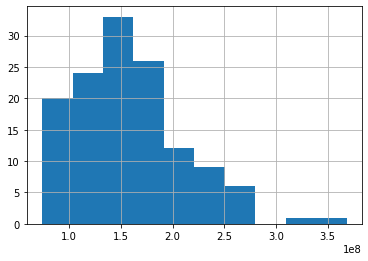

In [297]:
#histogram #1 adjusted budget
df_director_p.budget_adj.hist()

<AxesSubplot:>

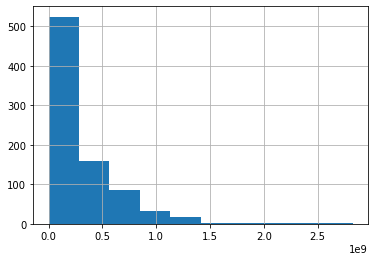

In [298]:
df_director_r.revenue_adj.hist()

<AxesSubplot:>

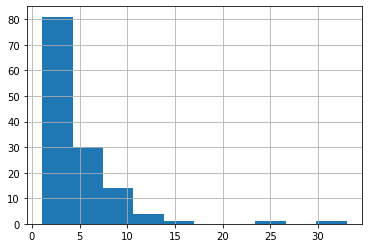

In [299]:
df_director_p.popularity.hist()

It appears the data is skewed to the right in the distributions for the budget_adj, revenue_adj, and popularity variables. Let's see how strong or weak the correlations are between the popularity and budget_adj and popularity and revenue_adj variables.  We'll create a function to produce scatter plots for these. 

In [300]:
def tmdbScatterPlots(df, xVar, yVar):
    """PlotLib objects which allows us to configure and 
   customize our plots. Most importantly it helps us avoid repetitive coding,
   a bad practice. The function has 3 parameters that accept arguments when we 
   call it. When the function is called it produces a scatter plot of two 
   variables."""
    
    # the plot statement
    df.plot(kind='scatter', x=xVar, y=yVar, color='orange', figsize=[14, 6]);
    
    #the independent variable xVar. we'll substitute a space in place of the underscore 
    #in the variable name
    xVar=xVar.replace('-', ' ')    
    yVar=yVar.replace('-', ' ') 
    
    #add the title to the plot
    plt.title(f'Relationship Between {yVar} and {xVar}'.title(), fontsize=14, weight="bold")
    
       
    #add plot labels
    plt.xlabel(xVar.title(), fontsize=10, weight="bold")    
    plt.ylabel(yVar.title(), fontsize=10, weight="bold")
    
    


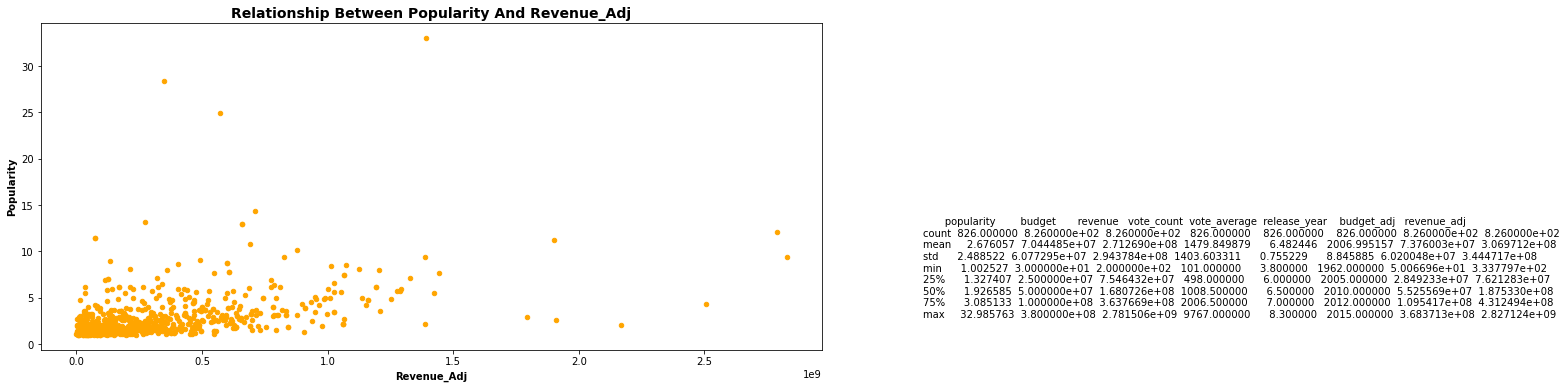

In [301]:
tmdbScatterPlots(df_director_r, 'revenue_adj', 'popularity')

The first scatter plot appears what looks like a possible weak positive correlation between the two variables. Let's do another one using popularity and budget_adj.

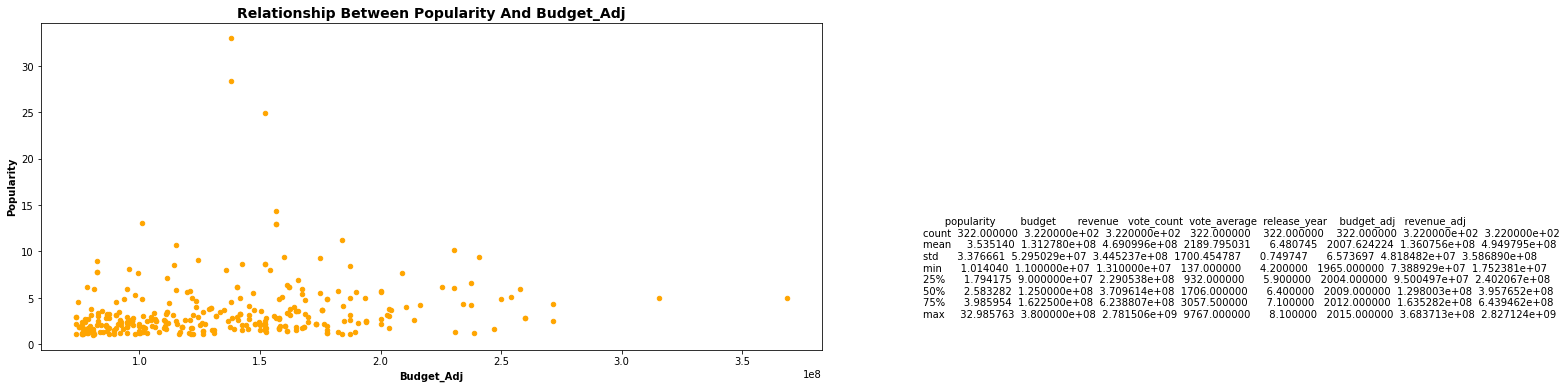

In [302]:
tmdbScatterPlots(df_director_b, 'budget_adj', 'popularity')


Like the previous plot, this one also shows what might be a weak positive correlation but perhaps less than the first plot.

## Research Question 2: Is the popularity score influenced by the director of the film? Who are the top directors based on their popularity scores, adjusted revenue and adjusted budget?

Now we'll narrow down our list of directors whose movies generated the most revenue adjusted for inflation. First we'll aggregate our list and return the top ten with the most revenue.

In [303]:
#return the top ten directors based on popularity
df_director_p = df_director_p.groupby('director')['popularity'].sum().nlargest(10)
df_director_p


director
Christopher Nolan    49.370722
Peter Jackson        42.497467
Colin Trevorrow      32.985763
Francis Lawrence     23.830158
David Yates          20.506537
Gore Verbinski       16.035450
Pete Docter          14.440001
James Gunn           14.311205
James Cameron        13.787987
Joss Whedon          13.582694
Name: popularity, dtype: float64

The previous query returns the top ten directors and the sum of their popularity scores. Now let's create some bar plots so we can have a better understanding of our data.

(-0.6, 10.0)

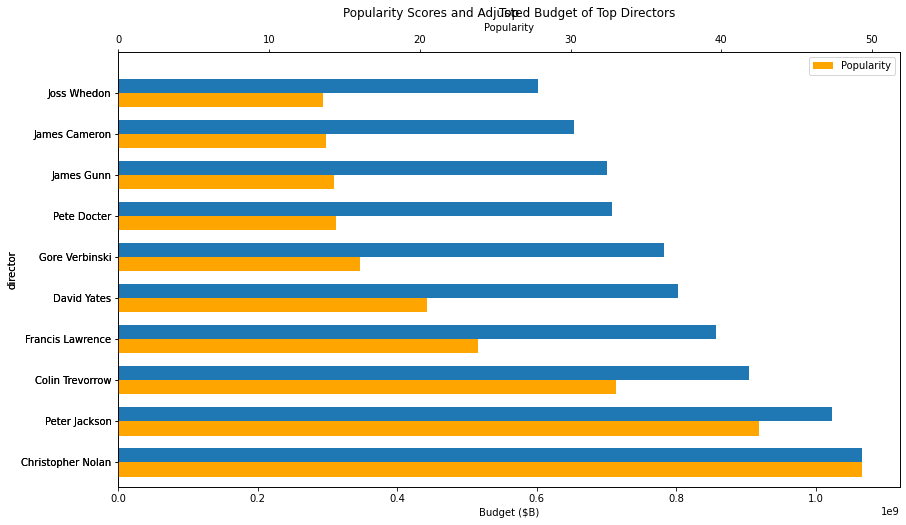

In [304]:
#plots and histograms -  popularity and budget adjusted 

#using groupby() with budget_adj
df_director_b = df_director_b.groupby('director')['budget_adj'].sum().nlargest(10)


#overlay popularity score with the budget adjusted beside it
fig, ax = plt.subplots(1, figsize=[14, 8]);

#budget plot
df_director_b.plot(kind='barh', width=0.35, title=" Top ", label="Budget", ax=ax,position=0);

ax.set_xlabel('Budget ($B)')

#create the second axis
ax1 = ax.twiny()

#popularity plot
df_director_p.plot(kind='barh', width=0.35, title="Popularity Scores and Adjusted Budget of Top Directors", color='orange', label="Popularity", ax=ax1, position=1);
ax1.set_xlabel('Popularity')

#add legend
plt.legend()

plt.ylim(None, 10)


Plot showing the top directors and their popularity scores alongside the budget adjusted for inflation above the mean.

(-0.6, 10.0)

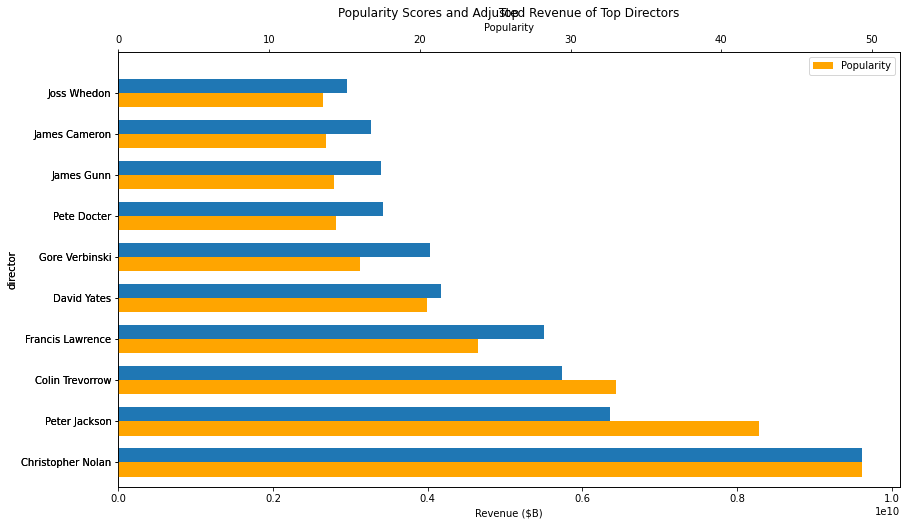

In [305]:
#plots and histograms - popularity and revenue adjusted

#using groupby() with revenue_adj
df_director_r = df_director_r.groupby('director')['revenue_adj'].sum().nlargest(10)

#overlay popularity score with the adjusted revenue beside it
fig, ax = plt.subplots(1, figsize=[14, 8]);

#revenue plot
df_director_r.plot(kind='barh', width=0.35, title="Popularity Scores and Adjusted Revenue of Top Directors", label="Revenue", ax=ax,position=0);
ax.set_xlabel('Revenue ($B)')
ax1 = ax.twiny()
    
#popularity plot
df_director_p.plot(kind='barh', width=0.35, title=" Top ", color='orange', label="Popularity", ax=ax1, position=1);
ax1.set_xlabel('Popularity')

#add legend
plt.legend()
plt.ylim(None, 10)



Plot showing the top directors and their popularity scores alongside the revenue adjusted for inflation above the mean.



## Conclusions

This analysis is limited in that there may be other factors at play that explain what makes a movie popular. In addition, the accuracy of our analysis may be incomplete due to missing data or something else.  Another factor is the queries that were executed may have been amiss because of the constraints chosen for the query which resulted in a smaller dataset.

After thorough examination and visualizations, my conclusion regarding the first research question is there appears to be a weak positive correlation between the 'popularity' and 'budget_adj' variables. In the next plot I observe a weak positive correlation but the correlation looks stronger comparing popularity with the revenue adjusted variable. The findings suggest that the budget adjusted variable does not influence the popularity score as it appears there is no real relationship there, but it's possible that the revenue adjusted variable might have some influence although it is still considered weak. 

The bar plots in research question two shows the top directors popularity scores when compared with the budget_adj and revenue_adj variables. My conclusion upon observing these plots appears to align with the previous scatter plots, with weak correlations between popularity and budget adjusted, and stronger but still weak correlations between popularity and revenue adjusted.

Scott Phelps, WGU


References: https://stackoverflow.com, Udacity